# PARTIE 1: REGRESSION LINEAIRE

# I. IMPORTATION DES PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


# importation de WARNING
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf


In [2]:
# Charger le fichier Excel
#excel_file = 'C:/Users/User/PRO_EN_IA/INTERROGATION/dataset-uci.xlsxs'
#data = pd.read_excel(excel_file)

# Enregistrer en format CSV
#csv_file = 'dataset-uci.csv'
#data.to_csv(csv_file, index=False)

# II. CHRAGEMENT DES DONNEES

In [3]:
data = pd.read_csv("C:/Users/User/PRO_EN_IA/INTERROGATION/student/student-mat.csv", sep=';')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
data.shape # LE DATASET DISPOSE 5 247 LIGNES ET 7 COLONNES

(395, 33)

In [5]:
# ça donne les informations générales sur le dataset et détermine le type de données pour chaque colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# III. ANALYSE DES DONNEES

In [7]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
print(data.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [9]:
print(data.columns.tolist())

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [10]:
# Création de sub_data avec les colonnes appropriées
sub_data = data[['school', 'sex', 'age', 'G1', 'G2', 'G3']]

# Afficher le nouveau DataFrame
print(sub_data)

    school sex  age  G1  G2  G3
0       GP   F   18   5   6   6
1       GP   F   17   5   5   6
2       GP   F   15   7   8  10
3       GP   F   15  15  14  15
4       GP   F   16   6  10  10
..     ...  ..  ...  ..  ..  ..
390     MS   M   20   9   9   9
391     MS   M   17  14  16  16
392     MS   M   21  10   8   7
393     MS   M   18  11  12  10
394     MS   M   19   8   9   9

[395 rows x 6 columns]


# IV. PRE-TRAITEMENT DES DONNEES

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Supprimez les lignes avec des valeurs manquantes
data.dropna(subset=['school', 'sex'], inplace=True)

# Créez sub_data
sub_data = data[['school', 'sex', 'age', 'G1', 'G2', 'G3']]


In [12]:
# Vérifiez les colonnes
print(sub_data.columns.tolist())




['school', 'sex', 'age', 'G1', 'G2', 'G3']


In [13]:
print(sub_data[['school', 'sex']].head())

  school sex
0     GP   F
1     GP   F
2     GP   F
3     GP   F
4     GP   F


In [14]:
# Vérifiez les types de colonnes
print(sub_data.dtypes)



school    object
sex       object
age        int64
G1         int64
G2         int64
G3         int64
dtype: object


In [15]:

# Encodage des variables
sub_data['school'] = sub_data['school'].map({'GP': 0, 'MS': 1})
sub_data['sex'] = sub_data['sex'].map({'F': 0, 'M': 1})

# Afficher le DataFrame final
print(sub_data.head())

   school  sex  age  G1  G2  G3
0       0    0   18   5   6   6
1       0    0   17   5   5   6
2       0    0   15   7   8  10
3       0    0   15  15  14  15
4       0    0   16   6  10  10


# V. DIVISION DES DONNEES: Train et Test

In [16]:
from sklearn.model_selection import train_test_split

x = data[['school', 'sex', 'age', 'G1', 'G2']]
y = data['G3']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
y.unique

<bound method Series.unique of 0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 395, dtype: int64>

In [18]:
x_train,x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=1)
print("X_train:", x_train.shape )
print("X_test:", x_test.shape )
print("Y_train:", y_train.shape )
print("Y_test:", y_test.shape )

X_train: (276, 32)
X_test: (119, 32)
Y_train: (276,)
Y_test: (119,)


# VI. CONSTRUCTION DE Shallow Neural Network (Avec 4 Algo de ML)

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Supposons que vous avez déjà préparé votre DataFrame sub_data
# Exemple : sub_data = ...

# Définir les features et la target
X = sub_data.drop(['G1', 'G2', 'G3'], axis=1)  # Remplacez par la colonne cible souhaitée
y = sub_data['G3']  # Exemple avec G3 comme cible

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modèles à utiliser
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Random Forest': RandomForestRegressor()
}

# Dictionnaire pour stocker les résultats
results = {}

# Entraînement et évaluation des modèles
for name, model in models.items():
    model.fit(X_train, y_train)  # Entraînement
    y_pred = model.predict(X_test)  # Prédiction
    mse = mean_squared_error(y_test, y_pred)  # Calculer l'erreur quadratique moyenne
    r2 = r2_score(y_test, y_pred)  # Calculer le R²-score
    results[name] = {'MSE': mse, 'R²': r2}  # Stocker les résultats

# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame(results).T  # Transposer pour avoir les modèles en lignes

# Afficher le DataFrame
print(results_df)

                         MSE        R²
Linear Regression  19.206193  0.063343
Decision Tree      21.597091 -0.053257
SVR                19.946343  0.027247
Random Forest      19.906858  0.029173


In [20]:
# Créer un DataFrame pour afficher les résultats
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'MSE'])

# Afficher le DataFrame
print(results_df)

               Model                                                MSE
0  Linear Regression  {'MSE': 19.206193409695704, 'R²': 0.0633431292...
1      Decision Tree  {'MSE': 21.597091249972028, 'R²': -0.053257325...
2                SVR  {'MSE': 19.946343458530254, 'R²': 0.0272471358...
3      Random Forest  {'MSE': 19.906858238521718, 'R²': 0.0291727700...


### Shallow Neural Network

In [21]:
print(X_train.shape)

(316, 3)


In [22]:

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

# Définition du modèle DNN pour la régression
model_dnn = Sequential()
model_dnn.add(Dense(64, input_dim=3, activation='relu'))  # Couche d'entrée

# Couche intermédiaire 1
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.5))  # Dropout pour éviter le surapprentissage

# Couche intermédiaire 2
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))  # Dropout pour éviter le surapprentissage

# Couche de sortie pour la régression
model_dnn.add(Dense(1))  # Pas d'activation pour la régression linéaire

# Compilation du modèle
model_dnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae'])
# AFFICHAGE DE L'AQRCHITECTURE DU Rx DE NEURONE
model_dnn.summary()







# Entraînement du modèle
history = model_dnn.fit(X_train, y_train, epochs=50, verbose=1, validation_data=(X_test, y_test))








Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 72.9615 - mae: 7.5553 - val_loss: 23.0272 - val_mae: 3.8903
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.3989 - mae: 4.2792 - val_loss: 23.2210 - val_mae: 3.9105
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.4342 - mae: 4.2206 - val_loss: 29.7504 - val_mae: 4.5098
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.7809 - mae: 4.2619 - val_loss: 25.1327 - val_mae: 4.0827
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.0146 - mae: 4.3026 - val_loss: 24.0645 - val_mae: 3.9883
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 32.2612 - mae: 4.4119 - val_loss: 27.1733 - val_mae: 4.2855
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.5021 - mae: 4.3806 - val_loss: 26.5281 - val_mae: 4.2274
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 25.3345 - mae: 3.9933 - val_loss: 23.7507 - val_mae: 3.9594
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - los

# VII. VISUALISATION DE L'EVOLUTION DE L'ENTRAINEMENT DU Rx DE NEURONE

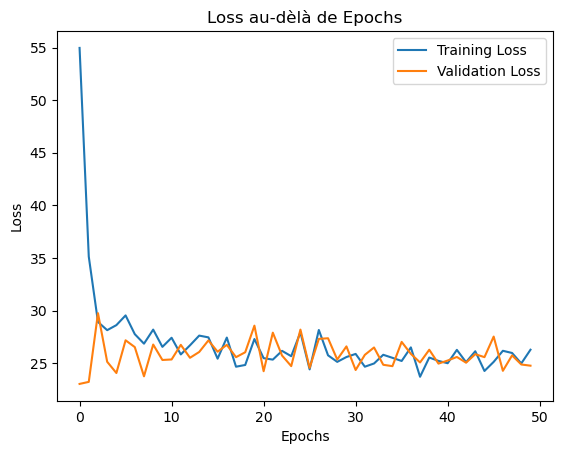

In [23]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss au-dèlà de Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# VIII. EVALUATION DU MODELE

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Mean Squared Error (MSE): 24.761364288388098
Mean Absolute Error (MAE): 4.08538295649275
R² Score: -0.20757389068603516


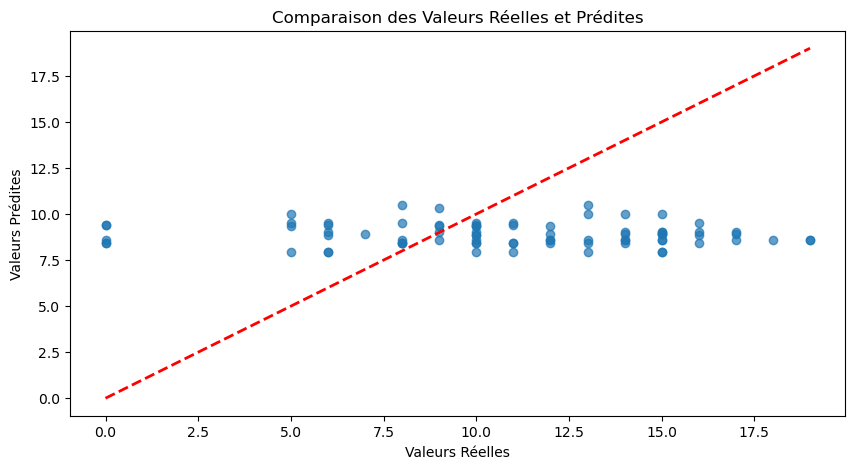

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Évaluation sur l'ensemble de test
y_pred = model_dnn.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)

# Graphique des prédictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Valeurs Prédites')
plt.title('Comparaison des Valeurs Réelles et Prédites')
plt.show()

# PARTIE 2: CLASSIFICATION

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, mean_squared_error # Ajout de mean_squared_error


In [45]:
# --- 1. Simulation de sub_data (À REMPLACER PAR VOTRE VRAI DATAFRAME sub_data) ---
np.random.seed(42)
num_samples = 200
data = {
    'feature_1': np.random.rand(num_samples) * 100,
    'feature_2': np.random.rand(num_samples) * 50,
    'G1': np.random.randint(0, 21, num_samples),
    'G2': np.random.randint(0, 21, num_samples),
    'G3': np.random.randint(0, 21, num_samples) # Simule une note G3 continue de 0 à 20
}
sub_data = pd.DataFrame(data)

In [46]:
# --- 2. Transformation de la variable cible 'G3' en catégories ---
bins = [-1, 9.99, 14.99, 21]
labels = [0, 1, 2]
sub_data['G3_category'] = pd.cut(sub_data['G3'], bins=bins, labels=labels, right=False, include_lowest=True).astype(int)

# Définir les features (X) et la target (y)
X = sub_data.drop(['G1', 'G2', 'G3', 'G3_category'], axis=1)
y = sub_data['G3_category']

print(f"Distribution des classes dans la variable cible (y):\n{y.value_counts()}")

Distribution des classes dans la variable cible (y):
G3_category
0    103
2     51
1     46
Name: count, dtype: int64


In [47]:
# --- 3. Séparer les données en ensembles d'entraînement et de test ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [48]:
# --- 4. Prétraitement des données : Standardisation ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
# --- 5. Modèles de Classification à utiliser ---
models = {
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'SVM': SVC(kernel='rbf', C=1.0, random_state=42),
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42, multi_class='auto'),
    'Shallow Neural Network': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500, random_state=42)
}

# Dictionnaire pour stocker les résultats
results = {}

In [50]:
# --- 6. Entraînement et Évaluation des Modèles de Classification ---
print("\n--- Résultats de la Classification ---")
for name, model in models.items():
    print(f"\nEntraînement et évaluation du modèle : {name}")

    if name == 'Decision Tree':
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

    # Calculer les métriques d'évaluation de la classification
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    
    # Calcul du Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred) # Calculé sur les étiquettes numériques (0, 1, 2)

    # AJOUT DU MSE AU DICTIONNAIRE results POUR LE TABLEAU FINAL
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MSE': mse # <-- C'est l'ajout manquant pour le tableau récapitulatif
    }

    # Afficher les métriques pour chaque modèle individuellement
    print(f"Précision (Accuracy): {accuracy:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"Rapport de Classification :\n{classification_report(y_test, y_pred, zero_division=0)}")
    print(f"Matrice de Confusion :\n{confusion_matrix(y_test, y_pred)}")



--- Résultats de la Classification ---

Entraînement et évaluation du modèle : K-Nearest Neighbors
Précision (Accuracy): 0.5000
MSE: 0.8750
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.62      0.76      0.68        21
           1       0.12      0.11      0.12         9
           2       0.50      0.30      0.38        10

    accuracy                           0.50        40
   macro avg       0.41      0.39      0.39        40
weighted avg       0.48      0.50      0.48        40

Matrice de Confusion :
[[16  3  2]
 [ 7  1  1]
 [ 3  4  3]]

Entraînement et évaluation du modèle : Decision Tree
Précision (Accuracy): 0.5750
MSE: 0.5750
Rapport de Classification :
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.20      0.22      0.21         9
           2       0.80      0.40      0.53        10

    accuracy                           0.57      

In [52]:
# --- 7. Créer un DataFrame pour afficher les résultats synthétiques ---
results_df = pd.DataFrame(results).T

print("\n--- Tableau Récapitulatif des Métriques de Classification ---")
print(results_df)


--- Tableau Récapitulatif des Métriques de Classification ---
                        Accuracy  Precision  Recall  F1-Score    MSE
K-Nearest Neighbors        0.500   0.476202   0.500  0.477667  0.875
Decision Tree              0.575   0.602000   0.575  0.568745  0.575
SVM                        0.525   0.275625   0.525  0.361475  1.225
Logistic Regression        0.450   0.305000   0.450  0.352083  1.525
Shallow Neural Network     0.550   0.466667   0.550  0.451923  0.975
